# Introduction

This assignment aims to provide a glimpse of the process of text preprocessing and the procedure of building a fully connected feedforward neural network to understand text.  We will also build another conventional supervised learning model for performance comparison. To obtain a relatively optimal model of neural networks, you need to tune hyperparameters associated the network. 

# Background

This assignment is based on Sentiment Analysis.  Sentiment analysis is one of the popular and highly useful applications in today's world, especially in the digital world. It is used in different fields, such as social media monitoring and market research. 


# Data 

To undertake these tasks, we will be using a data set – Cornell Sentence Polarity Dataset. 

This data was first introduced by Bo Pang and Lillian Lee in a research paper titled ‘Seeing stars: Exploiting class relationships for sentiment categorization with respect to rating scales.’ Published at ACL 2005. 

The starter notebook dataset contains 5331 positive and 5331 negative snippets of movie reviews. Authors assumed snippets (from Rotten Tomatoes webpages) for reviews marked with ‘fresh’ are positive, and those for reviews marked with ‘rotten’ are negative. 

# Problem Statement

You have to predict the sentiment of each review snippet, whether the review snippet is a positive or a negative one.


Specifically in this assignment, you are going to build two models: 
  - One conventional supervised learning model (non-neural network-based)
  - One deep learning based model

## How to use this Stub Notebook

- This notebook provides an overall structure to your assignment, and ensures that you are on the right track towards the end solution. You would find:

     - Each of the overall tasks for the assignment
     - A breakdown of the necessary steps to complete each task
     - Recommended approaches to solve each of the steps
     - Checklist to ensure that you're on the right track

- Note that there's no single correct approach to solve this assignment. Your approach would be evaluated fairly as long as the broad direction is correct, and you are able to achieve optimal results

## Task I - Represent each review using an N-gram model

For this task, you will perform the following steps:

- Data Loading
  - Import the necessary libraries
  - Load the dataset

- Use NLP techniques to preprocess the data set
    - Tokenization and Stopword removal
    - Stemming
    - Lemmatization
- Convert each document (i.e., a review) into a numeric vector using an N-gram model, in particular, the **Tf-Idf**

## Guidelines

To perform the above tasks and sub-tasks, perform the following steps:

- Load the necessary libraries and methods for this assignment
  - Loading and working with data sets - *pandas* and *NumPy*
  - Visualizing data - *pyplot* (from *matplotlib*) and *seaborn*
  - NLP techniques - To perform the text processing techniques use `nltk`. Also, download the necessary methods and corpuses from `nltk` for performing the steps such as  
    - Tokenization
    - Stop word removal
    - Stemming and Lemmatization
  -  Processing data:
    - *LabelEncoder* (from *sklearn.preprocessing*)
    - *train_test_split* (from *sklearn.model_selection*)
  - Conventional Machine Learning Models: Load the necessary packages for creating and evaluating the conventional machine learning models such as 
    - Logistic Regression
    - Decision Tree
    - Random Forests
    - kNN

  - Deep Learning Models: Import the necessary packages and methods for creating deep learning models
    - *tensorflow*
    - *keras*
    - all the necessary submodules and methods from the above to train and evaluate neural networks modules
  - Suppressing warnings
    

In [1]:
# Import libraries to load datasets
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for NLP techniques and for other pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score



# Import packages for building conventional supervised learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


# Import methods for building neural networks

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier


# Write code to suppress warnings
import os
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dabas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dabas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dabas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


 - Load the dataset and check a few reviews
     - If you're using your local machine, make sure that the data set is in the right folder
     - If you're using Google colab you can simply the upload the csv file containing the data to your Google Drive and mount your Google Drive in your Colab VM to access the data.

In [2]:
# Write code to read the dataset
movie_reviews = pd.read_csv('reviewsdata.csv')

In [3]:
# Check the 5 rows
movie_reviews.head()

,Review,Label
0,the rock is destined to be the 21st century's ...,pos
1,"the gorgeously elaborate continuation of "" the...",pos
2,effective but too-tepid biopic,pos
3,if you sometimes like to go to the movies to h...,pos
4,"emerges as something rare , an issue movie tha...",pos


### Tokenization and Stopwords removal

---

 - Initialize the tokenizer that you'll use. Note: This will impact your overall model building process.
 - Load the stop words from the nltk stopwords corpus and store it in a list *stopword_list*
 - Write a function `remove_stopwords` that takes a piece of text, tokenizes it and removes all the stopwords using the *stopword_list*
  - Input: a piece of text (`str`)
  - Output: the same piece of text, tokenized and with the stopwords removed.
 - Apply the function on a few rows from the data set and observe the results



In [4]:
tokenizer = word_tokenize #Create a Tokenizer object
stopword_list = set(stopwords.words('english')) #create a list of individual stopwords from the nltk library in the stopwords package
stemmer = PorterStemmer() # Create a stemmer object
lemmatizer = WordNetLemmatizer() #Create a Lemmatizer object

#defining the functions for tokenizing, stemming and lemmatizing the the reviews by iterating over them 

def remove_stopwords(text):
    tokens = tokenizer(text.lower())
    return ' '.join([token for token in tokens if token.isalnum() and token not in stopword_list])

def simple_stemmer(text):
    tokens = tokenizer(text.lower())
    return ' '.join([stemmer.stem(token) for token in tokens if token.isalnum()])

def simple_lemmatize(text):
    tokens = tokenizer(text.lower())
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens if token.isalnum()])

# Example usage and verification
sample_text = "The movie was absolutely fantastic! I loved the plot and the acting was superb."
print("Original:", sample_text)
print("After stopword removal:", remove_stopwords(sample_text))
print("After stemming:", simple_stemmer(sample_text))
print("After lemmatization:", simple_lemmatize(sample_text))

# Apply functions to the entire DataFrame
# Uncomment these lines when you're ready to process the entire dataset
movie_reviews['Review'] = movie_reviews['Review'].apply(remove_stopwords)
movie_reviews['Review'] = movie_reviews['Review'].apply(simple_stemmer)
movie_reviews['Review'] = movie_reviews['Review'].apply(simple_lemmatize)

Original: The movie was absolutely fantastic! I loved the plot and the acting was superb.
After stopword removal: movie absolutely fantastic loved plot acting superb
After stemming: the movi wa absolut fantast i love the plot and the act wa superb
After lemmatization: the movie wa absolutely fantastic i loved the plot and the acting wa superb


In [5]:
# Load the tokenizer. You can try out a few methods from the nltk.tokenize module and see which one performs best
movie_reviews['Review']

0        rock destin 21st centuri new conan go make spl...
1        gorgeous elabor continu lord ring trilog huge ...
2                                            effect biopic
3         sometim like go movi fun wasabi good place start
4        emerg someth rare issu movi honest keenli obse...
                               ...                        
10657            terribl movi peopl nevertheless find move
10658               mani definit waster movi must sure one
10659    stand crocodil hunter hurri badli cobbl look 1...
10660                               thing look like quicki
10661                                    enigma dri placid
Name: Review, Length: 10662, dtype: object

**Checklist**:

Check whether the function `remove_stopwords` is working as intended.
- Is it tokenizing the review snippet correctly?
- Are the unnecessary characters and stopwords removed?

Before applying the function on the entire data set, see if you can improve the tokenizer and/or your stopword list further.

**References**:

In case your tokenizer isn't performing satisfactorily, or if you're getting errors,  You can check out the following links for your reference
  - You can use `toktok Tokenizer` [Here's a link](https://www.nltk.org/api/nltk.tokenize.toktok.html) for your reference.
  - You might have to download `punkt` module in case you are getting errors. [Here's a link](https://www.nltk.org/api/nltk.tokenize.punkt.html) for your reference

**Next Steps**:

Once you're done with the verification and improvisation, the next step is to apply the `remove_stopwords` on the entire data.

### Tf-Idf Data Preparation

#### Guidelines

- Perform a train_test split of the reviews data. You can choose a split of your choice, along with any random state.
- Use the `TfidfVectorizer` object to create a n-gram model for both the train and validation reviews
- For this assignment, we recommend using max_features as `500`, though you can tweak the parameters to creat your final data set
- Also, ngram_range should be set to (1,2) 
- After `TfidfVectorizer` method has been initialized, use it to fit and transform the train data. Use the same tf-idf model to transform the validation data as well.
- Check the final shape of train and validation sets

In [6]:
# Perform a train-test split of the reviews data
train, val = train_test_split(movie_reviews, test_size=0.2, random_state=123)
print(train.shape)
print(val.shape)

(8529, 2)
(2133, 2)


In [7]:
train_reviews=list(train['Review'])
val_reviews=list(val['Review'])

# Tfidf vectorizer
# Note - Now, we have chosen 500 features for the vectorizer. You can tweak this parameter to create your final data set
tv = TfidfVectorizer(max_features=500, stop_words='english',use_idf=True, ngram_range=(1,2))
tv.fit(train_reviews)

# transformed train reviews
tv_train_reviews = tv.fit_transform(train_reviews)
# transformed val reviews
tv_val_reviews = tv.transform(val_reviews)


print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_val:', tv_val_reviews.shape)

Tfidf_train: (8529, 500)
Tfidf_val: (2133, 500)


### Label Encoding sentiments

#### Guidelines
- As you might have seen in the dataset, the sentiments are encoded as 'pos' and 'neg'
- We need to convert these to 1 and 0 respectively.

In [8]:
# Split the target variable to train and validation sets
train_sentiments=train['Label']
val_sentiments=val['Label']

# Converting 'pos' and 'neg' classes to '1' and '0' in the training data set output
le = preprocessing.LabelEncoder()
le.fit(train_sentiments)
train_sentiments = le.transform(train_sentiments)
train_sentiments = pd.DataFrame(train_sentiments, columns=['Label'])

# Converting 'pos' and 'neg' classes to '1' and '0' in the validation data set output
le = preprocessing.LabelEncoder()
le.fit(val_sentiments)
val_sentiments = le.transform(val_sentiments)
val_sentiments = pd.DataFrame(val_sentiments, columns = ['Label'])

print(train_sentiments)
print(val_sentiments)




      Label
0         1
1         0
2         0
3         1
4         0
...     ...
8524      0
8525      0
8526      1
8527      1
8528      1

[8529 rows x 1 columns]
      Label
0         0
1         1
2         1
3         1
4         1
...     ...
2128      1
2129      0
2130      1
2131      1
2132      1

[2133 rows x 1 columns]


# Task II - Build a conventional supervised machine learning model

## Guidelines

**Note** : The minimum requirement here is to build at least one conventional machine learning model. Though we recommend you try out multiple ML models and see which one is performing the best.

Here's our suggested approach:

 - Train different classification models on the training data set and test its performance
    - Logistic regression model
    - Decision tree model
    - kNN model
    - Random forest classifier model
    - Light gradient boosted tree classifier
 - Analyze the performance of all the models and select the one that performs with good accuracy and robustness
 - Perform hyperparameter tuning for the best model to further improve the model performance
 - Display the final model performance parameters like accuracy, confusion matrix, ROC and AUC.

 ### References

 - We strongly urge you to check the code that you learned in the Machine Learning course (You can refer to the Model Selection session for an overview of multiple ML models quickly).
 - Here's a list of documentations for different ML models that you can build here:
  - [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 
  - [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  - [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  - [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
  - [LGBM ](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [9]:
# Log Model
log_clf_best = LogisticRegression(penalty='l2', solver='lbfgs', random_state=0, max_iter=100).fit(tv_train_reviews, train_sentiments)
log_train_acc = log_clf_best.score(tv_train_reviews, train_sentiments)
log_val_acc = log_clf_best.score(tv_val_reviews, val_sentiments)

# Tree Model
tree_clf_best = DecisionTreeClassifier(random_state=0, max_depth=50)
tree_clf_best.fit(tv_train_reviews, train_sentiments)
tree_train_acc = tree_clf_best.score(tv_train_reviews, train_sentiments)
tree_val_acc = tree_clf_best.score(tv_val_reviews, val_sentiments)

# KNN Model
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 31)}  # Parameter range
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(tv_train_reviews, train_sentiments)

# Using the best parameter and re-fitting a kNN model
knn_clf_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_clf_best.fit(tv_train_reviews, train_sentiments)
knn_train_acc = knn_clf_best.score(tv_train_reviews, train_sentiments)
knn_val_acc = knn_clf_best.score(tv_val_reviews, val_sentiments)

# Tabulating our results for training and validation accuracy
results_df = pd.DataFrame(
    [[log_train_acc, log_val_acc],
     [tree_train_acc, tree_val_acc],
     [knn_train_acc, knn_val_acc]],
    columns=['Training Acc', 'Validation Acc'],
    index=['Logistic', 'Tree', 'KNN']
)

print(results_df)

          Training Acc  Validation Acc
Logistic      0.734318        0.665729
Tree          0.735139        0.575715
KNN           0.817095        0.573840


In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    class_weight='balanced',
    random_state=123
)
rf.fit(tv_train_reviews, train_sentiments)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

In [11]:
rf_predictions_train = rf.predict(tv_train_reviews)

rf_predictions = rf.predict(tv_val_reviews)
rf_accuracy=accuracy_score(val_sentiments, rf_predictions)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.6409


In [12]:
# Evaluating the random forest model on the training and validation sets using confusion metrics and AUC of ROC
print('\n Confusion matrix on the training dataset:\n', confusion_matrix(train_sentiments, rf_predictions_train))
print('\n Confusion matrix on the validation dataset:\n', confusion_matrix(val_sentiments, rf_predictions))
print('\n AUC of ROC on the training dataset: \n', roc_auc_score(train_sentiments, rf_predictions_train))
print('\n AUC on ROC validation the dataset: \n', roc_auc_score(val_sentiments, rf_predictions))


 Confusion matrix on the training dataset:
 [[3293  969]
 [1588 2679]]

 Confusion matrix on the validation dataset:
 [[761 308]
 [458 606]]

 AUC of ROC on the training dataset: 
 0.7002417635060553

 AUC on ROC validation the dataset: 
 0.6407145670537429


In [30]:
lgbm = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=123,
    class_weight='balanced'
)

# Fitting the LGBM classifier to the data
lgbm.fit(tv_train_reviews, train_sentiments)

# Making predictions on the validation set
lgbm_predictions = lgbm.predict(tv_val_reviews)
lgbm_predictions_train = lgbm.predict(tv_train_reviews)

# Calculating accuracy
lgbm_accuracy = accuracy_score(val_sentiments, lgbm_predictions)
print(f"LGBM Classifier Accuracy: {lgbm_accuracy:.4f}")

[LightGBM] [Info] Number of positive: 4267, number of negative: 4262
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12397
[LightGBM] [Info] Number of data points in the train set: 8529, number of used features: 500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [31]:
# Evaluating the gradient boosted model on the training and validation sets using confusion metrics and AUC of ROC
print('\n Confusion matrix on the training dataset:\n',
      confusion_matrix(train_sentiments, lgbm_predictions_train))
print('\n Confusion matrix on the validation dataset:\n',
      confusion_matrix(val_sentiments, lgbm_predictions))
print('\n ROC AUC on the training dataset: \n',
      roc_auc_score(train_sentiments, lgbm_predictions_train))
print('\n ROC AUC on the validation dataset: \n',
      roc_auc_score(val_sentiments, lgbm_predictions))
print('\n Accuracy on the training dataset:\n',
      accuracy_score(train_sentiments, lgbm_predictions_train))
print('\n Accuracy on the validation dataset:\n',
      accuracy_score(val_sentiments, lgbm_predictions))


 Confusion matrix on the training dataset:
 [[3416  846]
 [1293 2974]]

 Confusion matrix on the validation dataset:
 [[756 313]
 [426 638]]

 ROC AUC on the training dataset: 
 0.7492392205545005

 ROC AUC on the validation dataset: 
 0.6534135268011001

 Accuracy on the training dataset:
 0.7492085824832923

 Accuracy on the validation dataset:
 0.653539615564932


# Task III - Build a deep learning model

## Guidelines

For this task, you will perform the following steps:
  - Convert the data set stored in as a sparse matrix to a sparse tensor for the Keras model
    - A reference code is provided below
  - Create a simple fully-connected feedforward neural network
  - Fit the model on the training data set
  - Test the accuracy of the model on the validation data set
  - Show how the accuracy changes with every epoch during the training

#### Reference code for converting the sparse Tf-idf matrix to a sparse tensor

Converting the sparse matrix of a dataset obtained from Tf-Idf vectorization to a sparse tensor.This is done as Keras runs on Tensorflow backend and a Keras model accepts a sparse tensor as input, not a sparse matrix.

You can do the same easily using the `tf.SparseTensor` method([documentation](https://www.tensorflow.org/api_docs/python/tf/sparse/SparseTensor)) along with the `.tocoo()` method ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.tocoo.html))

The steps are as follows:

-  The .tocoo() method converts the tf-idf matrix to a coordinate format.
-  the tf.SparseTensor() method takes the output of the .tocoo() method and creates a SparseTensor

A sample code has been provided here

In [14]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

After obtaining the sparse matrix from the above function, you have to do sparse reordering because tensorflow accepts input in row-major format. You can do the same using the `tf.sparse.reorder` method

You can check out its documentation [here](https://www.tensorflow.org/api_docs/python/tf/sparse/reorder)

### Creating the sparse tensor input for both train and validation sets

In [15]:

# For the training dataset
tv_train_reviews_nn = tf.sparse.reorder(
    convert_sparse_matrix_to_sparse_tensor(tv_train_reviews)) #Independent Variable
train_sentiments_nn = np.asarray(train_sentiments) #Target Variable

# For the validation dataset
tv_val_reviews_nn = tf.sparse.reorder(
    convert_sparse_matrix_to_sparse_tensor(tv_val_reviews)) #Independent Variable
val_sentiments_nn = np.asarray(val_sentiments) #Target Variable

---

## Building the Neural Network

Now that you saw how to convert the data to the correct format, it's time to implement it.



### Define the neural network function

You can now go ahead and build the neural network. Here are a sample set of instructions that you may follow for this


- Start by defining a function called `create_nn` with two parameters: activation_function and hidden1_neurons.

- Inside the function, create a sparse input layer for a neural network using keras.Input(). Set the shape parameter to the correct value to indicate the input shape and `sparse=True` to specify that the input is a sparse tensor. Assign this input layer to a variable called `input`.

- Create the first hidden layer of the neural network using layers.Dense(). Set the units parameter to hidden1_neurons (which has a default value of 256) and the activation parameter to activation_function. Pass the input layer as the input to this hidden layer. Assign this hidden layer to a variable called hidden1.

- Create the second hidden layer of the neural network using layers.Dense(). Set the units parameter to 64 and the activation parameter to activation_function. Pass the hidden1 layer as the input to this hidden layer. Assign this hidden layer to a variable called hidden2.

- Create the output layer of the neural network using layers.Dense(). Set the units parameter to 1 (since it has only one node). Pass the hidden2 layer as the input to this output layer. Assign this output layer to a variable called output.

- Use keras.Model() to create the neural network model. Pass the input layer as the first argument and the output layer as the second argument. This function call will create and return the fully connected feedforward neural network.
Finally, add a return statement to return the created model.

*Remember to import the necessary libraries, such as tensorflow and keras, before running the code*







In [16]:
def create_nn(activation_function='sigmoid', hidden1_neurons=256):
    # Input layer
    input = keras.Input(shape=(500,), sparse=True, name="tfidf_maxfeatures") #Input shape is (500,) becuase max_features was 500 and it has ben converted to a 1 dimensional aray
    
    # First hidden layer
    hidden1 = layers.Dense(hidden1_neurons, activation=activation_function)(input)
    
    # Second hidden layer
    hidden2 = layers.Dense(64, activation=activation_function)(hidden1)
    
    # Output layer
    output = layers.Dense(1, activation="sigmoid")(hidden2)
    
    return keras.Model(inputs=input, outputs=output)

Build the FCFNN instance

- Create an instance of the fully connected feedforward neural network.
- Set the learning rate value to 0.01. This value will be used when compiling the neural network.
- Compile the neural network using the compile() method of nn1. 
- **Important** - Set the loss parameter to `'binary_crossentropy'`, since the output layer has only 1 node. 
- Set the metrics parameter to ['accuracy'] to track the accuracy during training. 
- For the optimizer parameter, create an instance of the RMSprop optimizer 
- Call the summary() method on the instance to print a summary of the neural network architecture.

*Remember to import the necessary libraries, such as tensorflow, keras, and RMSprop, before running the code.*

In [17]:
nn1 = create_nn()

# Note: Since the output layer has only 1 node, you can use "binary_crossentropy"
learning_rate_value = 0.01
nn1.compile(loss = 'binary_crossentropy',
            metrics = ['accuracy'],
            optimizer = RMSprop(learning_rate = learning_rate_value))

nn1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfidf_maxfeatures (InputLayer)  │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       128,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,769 (565.50 KB)

 Trainable params: 144,769 (565.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
## Build the FCFNN instance using the instructions shared above or you can follow your own approach

Build a simple FCFNN model

- Train the neural network model on the dataset using the fit() method of the FCFNN instance you built previously
- Pass the training data and the validation data
- Set the epochs parameter to 10 to specify the number of training epochs.
- The fit() method will return a history object that contains information about the training process. Assign this object to a variable

In [19]:
# Train the neural network model on the dataset
nn1_history = nn1.fit(tv_train_reviews_nn,
                      train_sentiments_nn,
                      validation_data=(tv_val_reviews_nn, val_sentiments_nn),
                      epochs=10)


Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4860 - loss: 0.7795 - val_accuracy: 0.4988 - val_loss: 0.7203
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4981 - loss: 0.7031 - val_accuracy: 0.5012 - val_loss: 0.7014
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4999 - loss: 0.6992 - val_accuracy: 0.4988 - val_loss: 0.6950
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4994 - loss: 0.7000 - val_accuracy: 0.5012 - val_loss: 0.7042
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4982 - loss: 0.7003 - val_accuracy: 0.4988 - val_loss: 0.7001
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4906 - loss: 0.6997 - val_accuracy: 0.5012 - val_loss: 0.6971
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5057 - loss: 0.6984 - val_accuracy: 0.4988 - val_loss: 0.7020
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4971 - loss: 0.6996 - val_accuracy: 0.

Convert Neural Network History to a DataFrame and Plot it
 
- Create a DataFrame containing the training history of the neural network.
- Add a new column to the DataFrame called 'epoch' that represents the epochs of the training process.
- After that plot the training and validation accuracies as functions of epoch



In [20]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
1,0.495486,0.716374,0.498828,0.720344
2,0.507797,0.700272,0.501172,0.701415
3,0.499590,0.699664,0.498828,0.695036
4,0.502521,0.698583,0.501172,0.704157
5,0.498417,0.699859,0.498828,0.700053
6,0.502873,0.698804,0.501172,0.697127
7,0.502873,0.699309,0.498828,0.701972
8,0.494900,0.699810,0.498828,0.703523
9,0.496776,0.699492,0.498828,0.693749


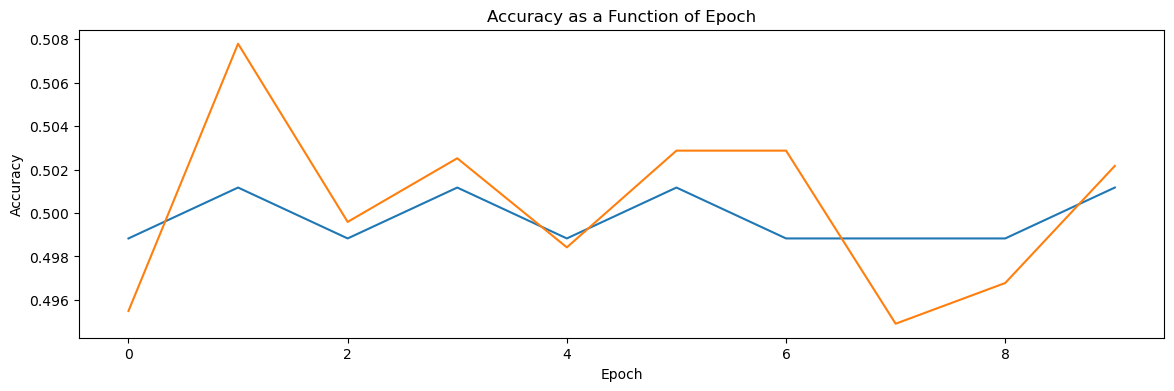

In [21]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(hist['val_accuracy'])
sns.lineplot(hist['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

Check the validation accuracy

In [22]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method

performance_test = nn1.evaluate(tv_val_reviews_nn, val_sentiments_nn)

print('The loss value of the model on the validation data is {}'.format(
    performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(
    performance_test[1]))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 0.7042
The loss value of the model on the validation data is 0.7026933431625366
The accuracy of the model on the validation data is 0.5011720657348633


### Hyperparameter Tuning

Now that you have built a simple FCFNN model, it's time to optimize the model using hyperparameter tuning.

#### Guidelines
Here are a few guidelines on how to do the same:

- Choose multiple activation functions such as 'sigmoid' and 'relu'.

- Choose multiple values for hidden neurons such as 128 and 256.

- Create an empty DataFrame to store the performance results of the nn models that we plan to build

- Run a nested loop across all the different activation functions in activation_function_list, and over the number of neurons in hidden1_neurons_list. and create a neural network for each instance.

- Complie the model similar to how built the simple FCFNN model. Use the different parameters accordingly.

- Create a DataFrame with the relevant information (activation function, number of neurons, train accuracy, and validation accuracy) for the current model.

- Concatenate the same with the previous empty DataFrame that we created. After the nested loop finishes, the DataFrame will contain the performance results for each model.

In [24]:
# Declare a range of activation functions and number of neurons in the first hidden layer to tune for
activation_function_list = ['sigmoid', 'relu']
hidden1_neurons_list = [128, 256]

# Create and train a neural network model for each value of learning rate
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        
        # Create a neural network model using the 'create_nn' function
        # Note: Set the 'activation_function' parameter to 'current_activation_function'
        # Note: Set the 'activation_function' parameter to 'current_activation_function'
        nn = create_nn(activation_function = current_activation_function,
                      hidden1_neurons = current_hidden1_neurons)
        
        nn.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer = RMSprop(learning_rate = 0.01))

        # Capture the training history of the model using the 'fit()' method
        # Note: Set the 'epochs' parameter to 200
        # Note: Set the 'batch_size' to 'X_train.shape[0]'
        print('\n activation_function = {},'.format(current_activation_function) + ' hidden1_neurons = {} - START \n'.format(current_hidden1_neurons))
        nn.summary()
        print('\n')
        nn_history = nn.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data=(tv_val_reviews_nn, val_sentiments_nn), epochs = 10)
        print('\n activation_function = {},'.format(current_activation_function) + ' hidden1_neurons = {} - END \n'.format(current_hidden1_neurons))
        
        hist[indexcount] = pd.DataFrame(nn_history.history)
        hist[indexcount]['epoch'] = nn_history.epoch
        
        tempdf = pd.DataFrame(index = [indexcount],
                              data = {'Activation Function': current_activation_function,
                                      'First hidden layer neurons': current_hidden1_neurons,
                                      'Train Accuracy': hist[indexcount]['accuracy'][9], 
                                      'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})
        
        performance_df = pd.concat([performance_df, tempdf])


 activation_function = sigmoid, hidden1_neurons = 128 - START 



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfidf_maxfeatures (InputLayer)  │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,449 (283.00 KB)

 Trainable params: 72,449 (283.00 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4984 - loss: 0.7309 - val_accuracy: 0.4988 - val_loss: 0.6982
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5065 - loss: 0.6972 - val_accuracy: 0.4988 - val_loss: 0.7040
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4942 - loss: 0.6987 - val_accuracy: 0.5012 - val_loss: 0.6993
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4968 - loss: 0.6984 - val_accuracy: 0.5012 - val_loss: 0.6933
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5030 - loss: 0.6964 - val_accuracy: 0.4988 - val_loss: 0.7114
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5219 - loss: 0.6891 - val_accuracy: 0.5523 - val_loss: 0.7475
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6663 - loss: 0.6055 - val_accuracy: 0.6203 - val_loss: 0.7415
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7097 - loss: 0.5672 - val_accuracy: 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfidf_maxfeatures (InputLayer)  │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       128,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,769 (565.50 KB)

 Trainable params: 144,769 (565.50 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5106 - loss: 0.7502 - val_accuracy: 0.5012 - val_loss: 0.6988
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5125 - loss: 0.6986 - val_accuracy: 0.4988 - val_loss: 0.6944
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4965 - loss: 0.7018 - val_accuracy: 0.4988 - val_loss: 0.6952
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4893 - loss: 0.7020 - val_accuracy: 0.5012 - val_loss: 0.7010
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4970 - loss: 0.7016 - val_accuracy: 0.4988 - val_loss: 0.7186
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4889 - loss: 0.7013 - val_accuracy: 0.5012 - val_loss: 0.7292
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5006 - loss: 0.7005 - val_accuracy: 0.5012 - val_loss: 0.6950
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5042 - loss: 0.6998 - val_accuracy: 

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfidf_maxfeatures (InputLayer)  │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,449 (283.00 KB)

 Trainable params: 72,449 (283.00 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6306 - loss: 0.6352 - val_accuracy: 0.6704 - val_loss: 0.5984
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7262 - loss: 0.5432 - val_accuracy: 0.6634 - val_loss: 0.6017
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7440 - loss: 0.5162 - val_accuracy: 0.6648 - val_loss: 0.6242
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7831 - loss: 0.4548 - val_accuracy: 0.6779 - val_loss: 0.6559
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.3908 - val_accuracy: 0.6639 - val_loss: 0.7510
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8494 - loss: 0.3261 - val_accuracy: 0.6610 - val_loss: 0.9153
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8772 - loss: 0.2654 - val_accuracy: 0.6578 - val_loss: 1.0607
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9104 - loss: 0.2008 - val_accuracy: 

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfidf_maxfeatures (InputLayer)  │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       128,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,769 (565.50 KB)

 Trainable params: 144,769 (565.50 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6249 - loss: 0.6411 - val_accuracy: 0.6695 - val_loss: 0.5999
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7348 - loss: 0.5307 - val_accuracy: 0.6676 - val_loss: 0.5989
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7596 - loss: 0.5010 - val_accuracy: 0.6709 - val_loss: 0.6574
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.4379 - val_accuracy: 0.6606 - val_loss: 0.7696
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.3347 - val_accuracy: 0.6653 - val_loss: 0.8474
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8899 - loss: 0.2417 - val_accuracy: 0.6540 - val_loss: 1.2361
Epoch 7/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.1758 - val_accuracy: 0.6428 - val_loss: 1.3915
Epoch 8/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9455 - loss: 0.1261 - val_accuracy: 

In [32]:
## Show the performance results for each of the neural network models that we build
performance_df

,Activation Function,First hidden layer neurons,Train Accuracy,Validation Accuracy
0,sigmoid,128,0.715910,0.670417
1,sigmoid,256,0.515418,0.501172
2,relu,128,0.938094,0.635724
3,relu,256,0.956736,0.645570


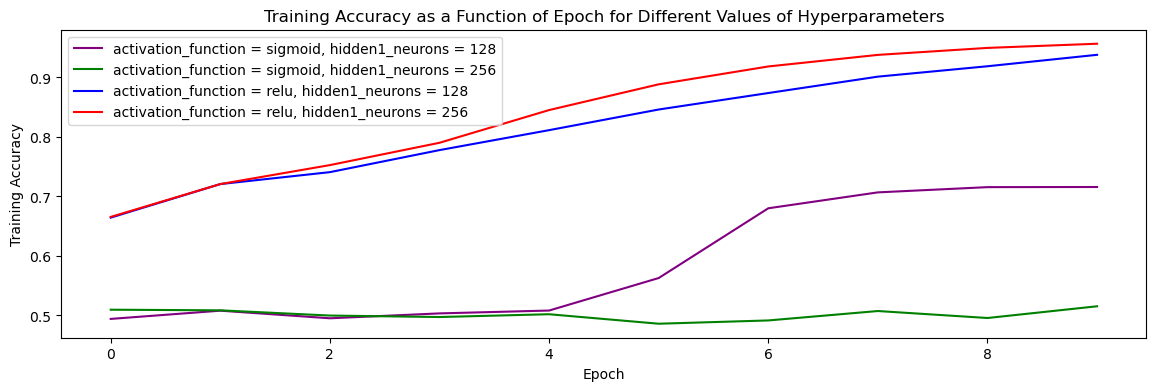

In [33]:
# Visualize the validation accuracies as functions of epochs for different values of learning rate
plt.figure(figsize=(14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        sns.lineplot(data=hist[indexcount],
                     x='epoch',
                     y='accuracy',
                     color=colorlist[indexcount],
                     label='activation_function = ' +
                     str(current_activation_function) +
                     ', hidden1_neurons = ' + str(current_hidden1_neurons))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Hyperparameters')
plt.show()

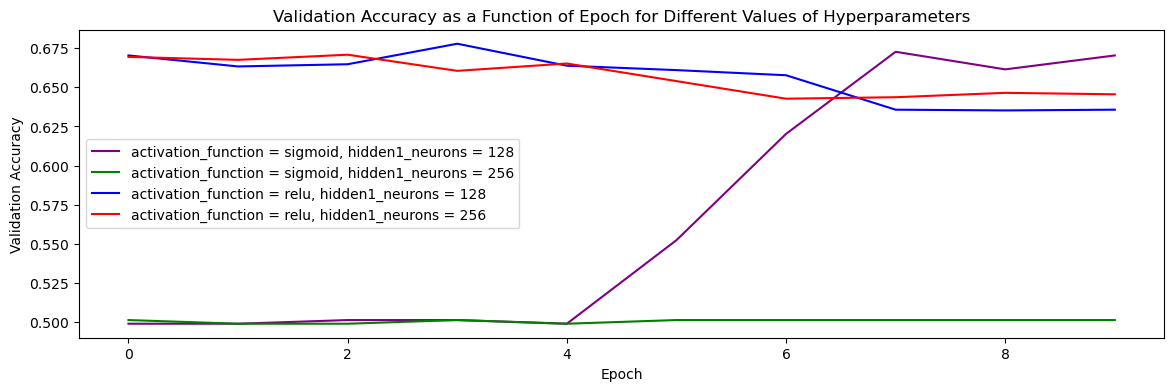

In [34]:
plt.figure(figsize=(14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        sns.lineplot(data=hist[indexcount],
                     x='epoch',
                     y='val_accuracy',
                     color=colorlist[indexcount],
                     label='activation_function = ' +
                     str(current_activation_function) +
                     ', hidden1_neurons = ' + str(current_hidden1_neurons))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title( 'Validation Accuracy as a Function of Epoch for Different Values of Hyperparameters')
plt.show()

### Building the optimal model

Once you have evaluated the performance for all the combination of hyperparameters, it's time to build the final model using the optimal values.

### Guidelines

- You can evaluate how the training and validation accuracies are changing for the different combination of hyperparameters in the previous step.This should give you an idea of the most optimal performance values that you can expect.

- Identify the hyperparameters for the best model, and use it to retrain the model.

- *Note that the validation accuracy may not be at par with the conventional models*. You should expect this and need not worry in case you get low values for validation accuracy. 

In [35]:
# Retrain the model with the optimal combination of hyperparameters and save its training history
# Follow the same guidelines as you have done previously to build the neural networks model

nn2 = create_nn(activation_function='relu', hidden1_neurons=256)

nn2.compile(loss='binary_crossentropy',
            metrics=['accuracy'],
            optimizer=RMSprop(learning_rate=0.01))

# Capture the training history of the model using the 'fit()' method|
# Note: Set the 'validation_split' parameter to 0.2
# Note: Set the 'epochs' parameter to 10
# Note: Set the 'batch_size' to 'best_batch_size' - This specifies the optimal
# value for the 'batch_size' parameter
nn2.summary()
print('\n')
nn2_history = nn2.fit(tv_train_reviews_nn,
                      train_sentiments_nn,
                      validation_data=(tv_val_reviews_nn, val_sentiments_nn),
                      epochs=20)
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfidf_maxfeatures (InputLayer)  │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       128,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,769 (565.50 KB)

 Trainable params: 144,769 (565.50 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6269 - loss: 0.6402 - val_accuracy: 0.6578 - val_loss: 0.6124
Epoch 2/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7240 - loss: 0.5430 - val_accuracy: 0.6709 - val_loss: 0.5987
Epoch 3/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7418 - loss: 0.5098 - val_accuracy: 0.6676 - val_loss: 0.6105
Epoch 4/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7767 - loss: 0.4509 - val_accuracy: 0.6634 - val_loss: 0.7056
Epoch 5/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8276 - loss: 0.3514 - val_accuracy: 0.6573 - val_loss: 0.7284
Epoch 6/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.2789 - val_accuracy: 0.6493 - val_loss: 1.0116
Epoch 7/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9269 - loss: 0.1943 - val_accuracy: 0.6423 - val_loss: 1.2889
Epoch 8/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9393 - loss: 0.1426 - val_accuracy: 

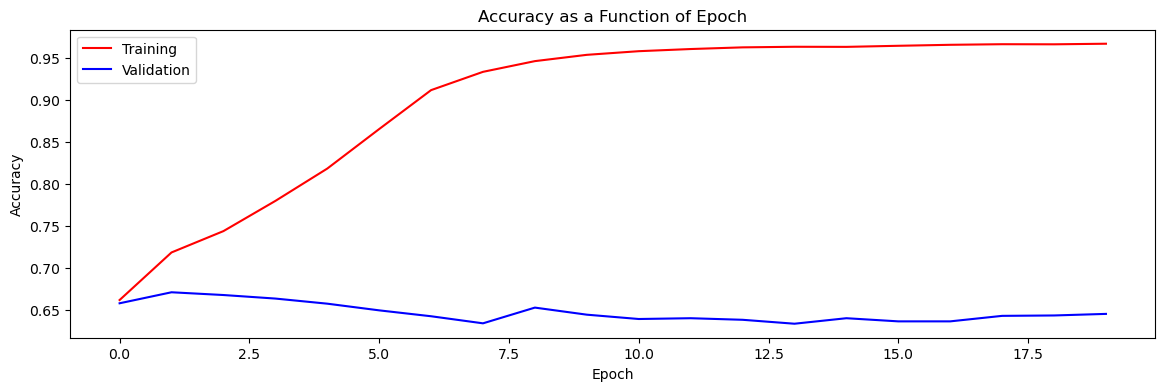

In [36]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize=(14, 4))

sns.lineplot(data=hist, x='epoch', y='accuracy', color='red', label='Training')
sns.lineplot(data=hist,
             x='epoch',
             y='val_accuracy',
             color='blue',
             label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch')

plt.show()

### Final validation accuracy

In [37]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn2.evaluate(tv_val_reviews_nn, val_sentiments_nn)

print('The loss value of the model on the validation data is {}'.format(
    performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(
    performance_test[1]))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6399 - loss: 2.9609
The loss value of the model on the validation data is 2.90320086479187
The accuracy of the model on the validation data is 0.6451007723808289


## Results

- Model Performance using Conventional Models
   - Training Accuracy: 74%
   - Validation Accuracy: 66%


- Model Performance using Deep Learning Models
   - Training Accuracy: 95%
   - Validation Accuracy: 64%

## Closing Remarks

Congratulations! You have now reached the end of this assignment. With this, you are now well equipped with the skills to tackle advanced NLP problems that require DL applications as well. 

In fact, if you are felt that the performance of the basic neural network models left much to be desired, don't worry! In the upcoming weeks you'll learn some state of the art DL/NLP architectures such as transformers which perform significantly better and are responsible for some of the current advances in AI. We hope you have a great experience ahead!